# Covid Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("muted")
import matplotlib.pyplot as plt

## Reading the Data

In [2]:
cov=pd.read_excel("Covid Data.xlsx")

In [3]:
cov.shape

(28761, 6)

In [4]:
cov.head()

,Date,State,Confirmed Cases,Active Cases,Cured,Death
0,2020-03-27,Andaman and Nicobar Islands,1,1,0.0,0.0
1,2020-03-28,Andaman and Nicobar Islands,6,6,0.0,0.0
2,2020-03-29,Andaman and Nicobar Islands,9,9,0.0,0.0
3,2020-03-30,Andaman and Nicobar Islands,9,9,0.0,0.0
4,2020-03-31,Andaman and Nicobar Islands,10,10,0.0,0.0


In [5]:
cov.tail()

,Date,State,Confirmed Cases,Active Cases,Cured,Death
28756,2022-06-26,West Bengal,2024479,3496,1999767.0,21216.0
28757,2022-06-27,West Bengal,2024972,3777,1999979.0,21216.0
28758,2022-06-28,West Bengal,2025523,4080,2000227.0,21216.0
28759,2022-06-29,West Bengal,2026477,4759,2000502.0,21216.0
28760,2022-06-30,West Bengal,2027901,5885,2000798.0,21218.0


In [6]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28761 entries, 0 to 28760
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             28761 non-null  datetime64[ns]
 1   State            28761 non-null  object        
 2   Confirmed Cases  28761 non-null  int64         
 3   Active Cases     28761 non-null  int64         
 4   Cured            28760 non-null  float64       
 5   Death            28760 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


## Cleaning the Data

In [7]:
cov.isna()

,Date,State,Confirmed Cases,Active Cases,Cured,Death
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
28756,False,False,False,False,False,False
28757,False,False,False,False,False,False
28758,False,False,False,False,False,False
28759,False,False,False,False,False,False


In [8]:
cov.isna().sum()

Date               0
State              0
Confirmed Cases    0
Active Cases       0
Cured              1
Death              1
dtype: int64

### Replacing the null values with their Medians

In [9]:
cov.Cured.median()

117999.5

In [10]:
cov.Cured.fillna(cov.Death.median(),inplace=True)

In [11]:
cov.Death.median()

1497.5

In [12]:
cov.Death.fillna(cov.Death.median(),inplace=True)

In [13]:
cov.isna().sum()

Date               0
State              0
Confirmed Cases    0
Active Cases       0
Cured              0
Death              0
dtype: int64

## Exploratory Data Analysis

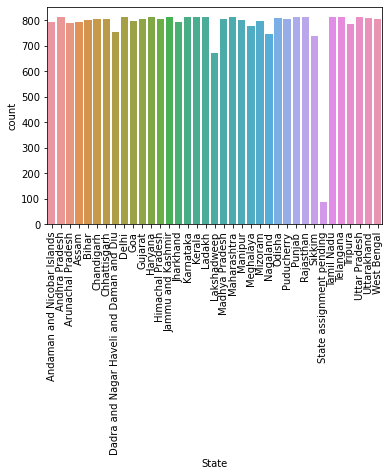

In [14]:
sns.countplot(x="State",data=cov)
plt.xticks(rotation=90)
plt.show()

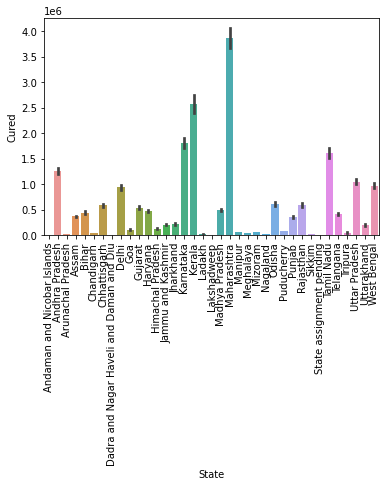

In [15]:
sns.barplot(x="State",y="Cured",data=cov)
plt.xticks(rotation=90)
plt.show()

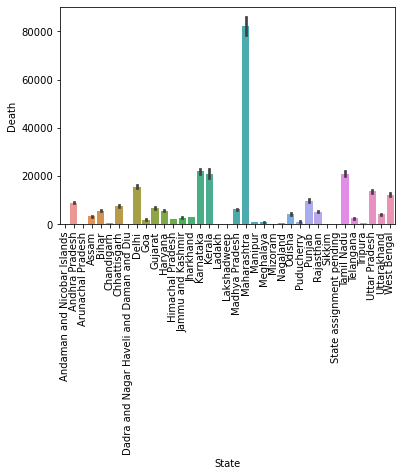

In [16]:
sns.barplot(x="State",y="Death",data=cov)
plt.xticks(rotation=90)
plt.show()

### Finding the states with a higher recovery rate

In [17]:
cured=cov.groupby(["State"],as_index=False)["Cured"].sum().sort_values(ascending=False,by="Cured").head()
cured

,State,Cured
20,Maharashtra,3.149841e+09
16,Kerala,2.090990e+09
15,Karnataka,1.466859e+09
31,Tamil Nadu,1.310893e+09
1,Andhra Pradesh,1.018732e+09


<AxesSubplot:xlabel='State', ylabel='Cured'>

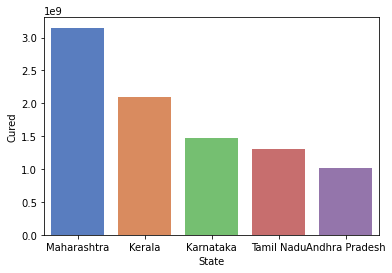

In [18]:
sns.barplot(x="State",y="Cured",data=cured)

### Finding the states with a higher fatality rate

In [19]:
deaths=cov.groupby(["State"],as_index=False)["Death"].sum().sort_values(ascending=False,by="Death").head()
deaths

,State,Death
20,Maharashtra,66847374.0
15,Karnataka,17801862.0
16,Kerala,17050171.0
31,Tamil Nadu,17041052.0
8,Delhi,12620945.0


<AxesSubplot:xlabel='State', ylabel='Death'>

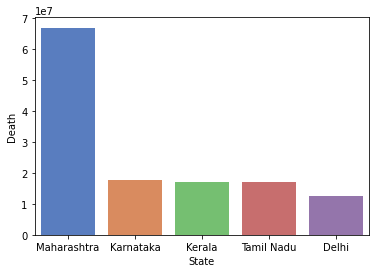

In [20]:
sns.barplot(x="State",y="Death",data=deaths)

### Visualizing the Confirmed Cases 

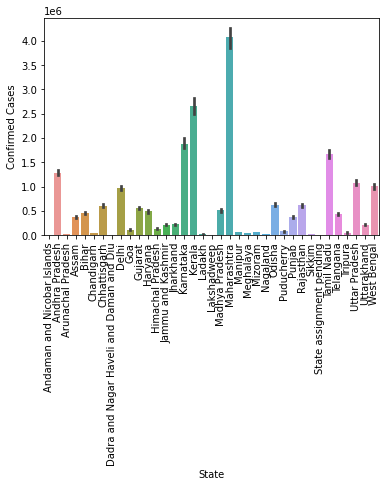

In [21]:
sns.barplot(x="State",y="Confirmed Cases",data=cov)
plt.xticks(rotation=90)
plt.show()

In [22]:
cc=cov.groupby(["State"],as_index=False)["Confirmed Cases"].sum().sort_values(ascending=False,by="Confirmed Cases")
cc

,State,Confirmed Cases
20,Maharashtra,3307600245
16,Kerala,2168877908
15,Karnataka,1530728709
31,Tamil Nadu,1356562158
1,Andhra Pradesh,1048013196
34,Uttar Pradesh,881231575
36,West Bengal,809692349
8,Delhi,787641180
25,Odisha,509921603
28,Rajasthan,498102579


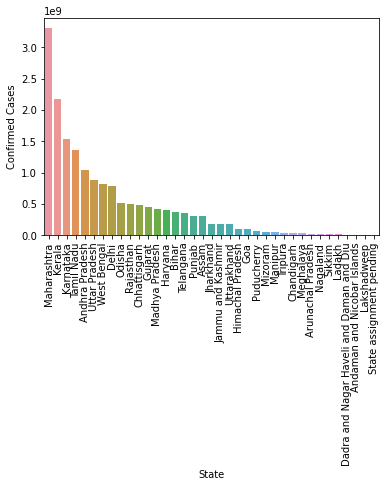

In [23]:
sns.barplot(x="State",y="Confirmed Cases",data=cc)
plt.xticks(rotation=90)
plt.show()

### Finding which state has the most Active Cases

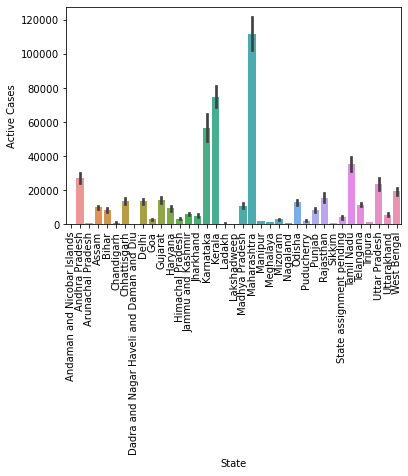

In [24]:
sns.barplot(x="State",y="Active Cases",data=cov)
plt.xticks(rotation=90)
plt.show()

In [25]:
ac=cov.groupby(["State"],as_index=False)["Active Cases"].sum().sort_values(ascending=False,by="Active Cases")
ac

,State,Active Cases
20,Maharashtra,90912115
16,Kerala,60837834
15,Karnataka,46067883
31,Tamil Nadu,28627946
1,Andhra Pradesh,22001587
34,Uttar Pradesh,19302136
36,West Bengal,15632643
28,Rajasthan,12732043
10,Gujarat,11332610
6,Chhattisgarh,10943686


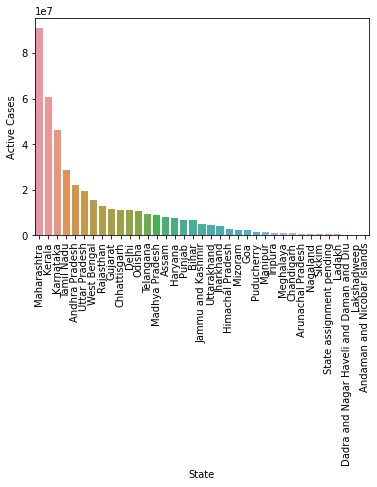

In [26]:
sns.barplot(x="State",y="Active Cases",data=ac)
plt.xticks(rotation=90)
plt.show()

## Active Cases per Year

In [27]:
ad=cov.groupby(["Date"],as_index=False)["Active Cases"].sum().sort_values(ascending=False,by="Active Cases").head()
ad

,Date,Active Cases
419,2021-05-10,3745237
418,2021-05-09,3736648
417,2021-05-08,3723446
420,2021-05-11,3715221
422,2021-05-13,3710525


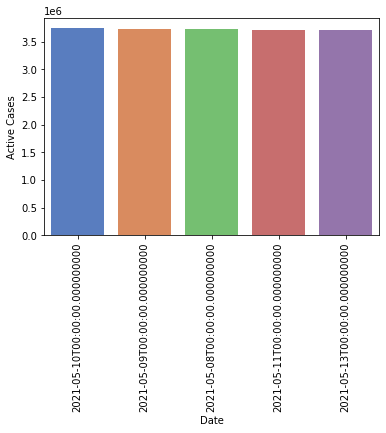

In [28]:
sns.barplot(x="Date",y="Active Cases",data=ad)
plt.xticks(rotation=90)
plt.show()

## In conclusion:
### We can see that Maharashtra is the state with the highest number of cases, while Andaman & Nicobar Islands have the least 
### Maharashtra however also has a higher recovery rate as compared to the other states
### In the May of 2021, we can observe a rise in the number of Active Cases
